# dependencies

In [1]:
!pip install folium

# import

In [2]:
import pandas as pd 
import numpy as np 

import folium

In [3]:
crash = pd.read_csv('crash.csv')

In [4]:
# 'Troop','County','Incident#','Unnamed: 0','Investigated By' dropped because they were not helpful
crash.drop(columns= ['Troop','County','Incident#','Unnamed: 0','Investigated By'],inplace=True)

In [5]:
crash

,GPS Latitude,GPS Longitude,Date,Time,Location
0,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF..."
1,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF..."
2,37.086639,-93.847805,04/26/2023,4:45PM,HWY H 1/2 MILE SOUTH OF MOUNT VERNON
3,37.023417,-93.969500,04/22/2023,2:50AM,COUNTY ROAD 1050 THREE MILES NORTH OF PIERCE CITY
4,36.942694,-93.927277,04/19/2023,2:40PM,"MO37 ONE MILE NORTH OF PIERCE CITY, MO"
...,...,...,...,...,...
147,37.074917,-93.965138,05/19/2022,8:27AM,I44 7 MILES WEST OF MOUNT VERNON
148,37.075611,-93.975027,05/17/2022,2:34AM,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY"
149,37.075611,-93.975027,05/17/2022,2:34AM,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY"
150,37.024778,-93.641502,05/11/2022,1:02AM,LAWRENCE 2170 1 MILE NORTH OF MARIONVILLE


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# create a map centered at the first latitude and longitude point
map_center = [crash['GPS Latitude'][0], crash['GPS Longitude'][0]]
m = folium.Map(location=map_center, zoom_start=4)

# add each latitude and longitude point to the map as a marker
for index, row in crash.iterrows():
    lat = row['GPS Latitude']
    lon = row['GPS Longitude']
    folium.Marker(location=[lat, lon], icon=folium.Icon(icon='flag', prefix='fa', color='blue', icon_color='white', tooltip=''), shadow=False).add_to(m)

# display the map
m


# these outliers are causing my map to be off

In [7]:
from scipy import stats

# Calculate the z-score for the GPS Longitude and GPS Latitude columns
z_lon = np.abs(stats.zscore(crash['GPS Longitude']))
z_lat = np.abs(stats.zscore(crash['GPS Latitude']))

# Identify outliers by setting a z-score threshold
z_thresh = 3
outliers_lon = crash[z_lon > z_thresh]
outliers_lat = crash[z_lat > z_thresh]

# Print the outlier values
print('Longitude outliers:')
print(outliers_lon)
print('Latitude outliers:')
print(outliers_lat)


Longitude outliers:
     GPS Latitude  GPS Longitude        Date    Time  \
69            0.0            0.0  05/23/2022  5:15PM   
144           0.0            0.0  05/23/2022  5:15PM   

                                          Location  
69   COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
144  COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
Latitude outliers:
     GPS Latitude  GPS Longitude        Date     Time  \
69            0.0        0.00000  05/23/2022   5:15PM   
98            0.0      -93.84275  12/28/2022  10:45PM   
144           0.0        0.00000  05/23/2022   5:15PM   

                                          Location  
69   COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
98                   MO 39 2 MILES NORTH OF MILLER  
144  COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  


In [8]:
# drop rows with index 1 and 3
crash = crash.drop(index=[69, 144, 98])


# plot on scatter

In [33]:
BBox = ((crash['GPS Longitude'].min(),   crash['GPS Longitude'].max(),      
         crash['GPS Latitude'].min(), 37.3 ))

In [34]:
BBox

(-94.051305, -93.616214, 36.9282222, 37.3)

In [35]:
# 'GPS Longitude min = - 94.051305
# GPS Longitude max = -93.616214

# GPS Latitude min = 36.9282222
# GPS Latitude max = 37.9841111

In [36]:
mymap = plt.imread('/Users/brandonnavarrete/codeup-data-science/reducing-county-collision/map.png')

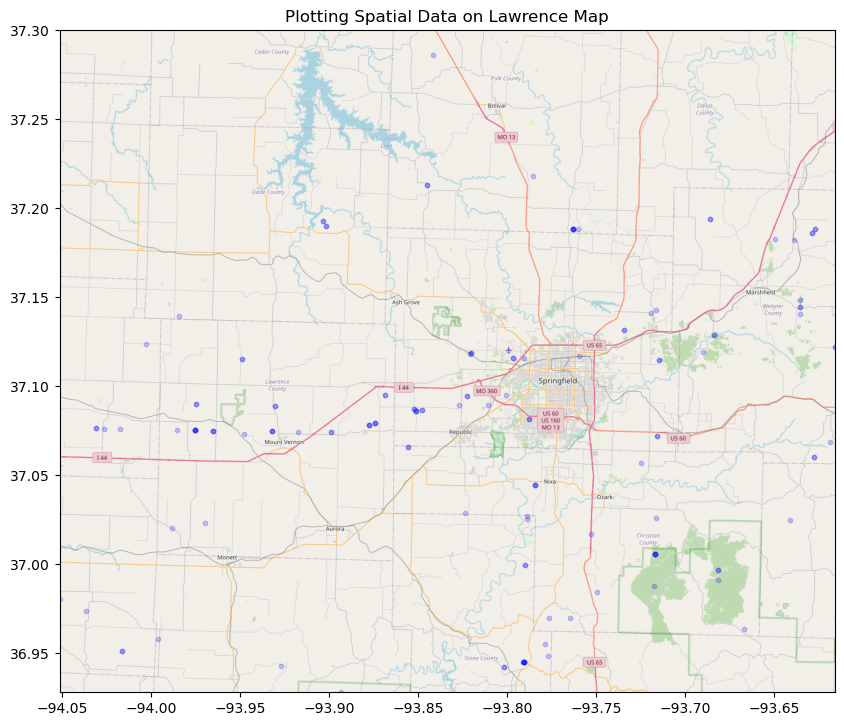

In [37]:
fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(crash['GPS Longitude'], crash['GPS Latitude'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Lawrence Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')

In [14]:
crash[['GPS Latitude']].sort_values(by = 'GPS Latitude',ascending= False)

,GPS Latitude
118,37.984111
43,37.984111
119,37.984111
103,37.285955
54,37.218000
...,...
94,36.945167
4,36.942694
44,36.942178
120,36.942178


In [42]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 6.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 5.0 MB/s eta 0:00:0000:0100:01


In [43]:
!pip install shapely

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

In [46]:
crash['cords'] = list(zip(crash['GPS Longitude'], crash['GPS Longitude']))


In [47]:
crash['cords'] = crash['cords'].apply(Point)
crash.head()

,GPS Latitude,GPS Longitude,Date,Time,Location,cords
0,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",POINT (-93.877861 -93.877861)
1,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",POINT (-93.877861 -93.877861)
2,37.086639,-93.847805,04/26/2023,4:45PM,HWY H 1/2 MILE SOUTH OF MOUNT VERNON,POINT (-93.847805 -93.847805)
3,37.023417,-93.969500,04/22/2023,2:50AM,COUNTY ROAD 1050 THREE MILES NORTH OF PIERCE CITY,POINT (-93.9695 -93.9695)
4,36.942694,-93.927277,04/19/2023,2:40PM,"MO37 ONE MILE NORTH OF PIERCE CITY, MO",POINT (-93.927277 -93.927277)


In [49]:
gdf = gpd.GeoDataFrame(crash, geometry="cords")
gdf.head()

,GPS Latitude,GPS Longitude,Date,Time,Location,cords
0,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",POINT (-93.878 -93.878)
1,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF...",POINT (-93.878 -93.878)
2,37.086639,-93.847805,04/26/2023,4:45PM,HWY H 1/2 MILE SOUTH OF MOUNT VERNON,POINT (-93.848 -93.848)
3,37.023417,-93.969500,04/22/2023,2:50AM,COUNTY ROAD 1050 THREE MILES NORTH OF PIERCE CITY,POINT (-93.969 -93.969)
4,36.942694,-93.927277,04/19/2023,2:40PM,"MO37 ONE MILE NORTH OF PIERCE CITY, MO",POINT (-93.927 -93.927)


In [50]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: cords


# map data

In [51]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
